In [1]:
#importing pandas library as pd
import pandas as pd

In [2]:
#reading the csv file 
df = pd.read_csv ('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#defining the feature column
feature_columns=['age','sex','cp','trestbps','chol','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [5]:
x = df[feature_columns] #feature variable
y = df.target #target variable

In [6]:
#splitting x and y i.e. feature and target variable into training and testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [7]:
#importing LogisticRegression module from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

#instantiating Logistic Regression model
logistic_reg = LogisticRegression()

#fitting Logistic Regression model with training dataset
logistic_reg.fit(X_train,y_train)

#performing prediction on the testing set
y_prediction = logistic_reg.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
#importing metrics module from sklearn
from sklearn import metrics

#determine performance of model using confusion matrix
confusion_matrix_outcome = metrics.confusion_matrix(y_test, y_prediction)
confusion_matrix_outcome

array([[33, 11],
       [ 6, 41]], dtype=int64)

In [9]:
# import required modules i.e. numpy, matplotlib.pyplot, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

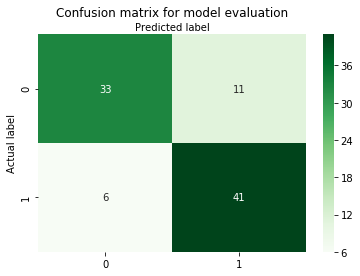

In [17]:
names_detail=[0,1] # names_detail list represents the name  of classes
fig, ax = plt.subplots()
plt.xticks(np.arange(len(names_detail)), names_detail)
plt.yticks(np.arange(len(names_detail)), names_detail)
# create heatmap according to confusion matrix i.e. confusion_matrix_outcome
sns.heatmap(pd.DataFrame(confusion_matrix_outcome), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix for model evaluation', y=1.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
#determining accuracy, precision and recall of the developed model
print("Accuracy of the model is:",metrics.accuracy_score(y_test, y_prediction))
print("Precision of the model is:",metrics.precision_score(y_test, y_prediction))
print("Recall of the model is:",metrics.recall_score(y_test, y_prediction))

Accuracy of the model is: 0.8131868131868132
Precision of the model is: 0.7884615384615384
Recall of the model is: 0.8723404255319149


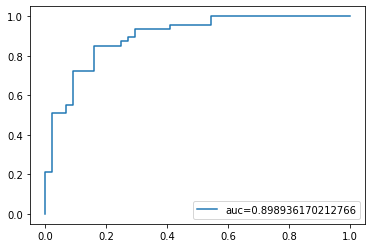

In [24]:
y_prediction_probability = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()